In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# data collection
data = pd.read_csv('./bbc_news.csv')

In [3]:
# data preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

In [5]:
data.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [6]:
data.tail()

,title,pubDate,guid,link,description
42110,Highlights: Wales make history in Dublin,"Tue, 03 Dec 2024 23:07:27 GMT",https://www.bbc.com/sport/football/videos/ckg1...,https://www.bbc.com/sport/football/videos/ckg1...,Watch highlights as Wales win 2-1 in Dublin fo...
42111,Gang jailed over £200m of cocaine in banana boxes,"Tue, 03 Dec 2024 17:48:54 GMT",https://www.bbc.com/news/articles/c3e8pvg284no#9,https://www.bbc.com/news/articles/c3e8pvg284no,More than two tonnes of the Class A drug was s...
42112,Scottish Budget presents huge challenges for SNP,"Tue, 03 Dec 2024 23:00:17 GMT",https://www.bbc.com/news/articles/ckg1m1j2grpo#9,https://www.bbc.com/news/articles/ckg1m1j2grpo,Finance Secretary Shona Robison is preparing t...
42113,Celebrations as Wales make history qualifying ...,"Wed, 04 Dec 2024 00:05:52 GMT",https://www.bbc.com/news/articles/c791nq8nl73o#9,https://www.bbc.com/news/articles/c791nq8nl73o,Wales defeated the Republic of Ireland 2-1 mak...
42114,School tells Muslim girls it’s ‘not safe’ for ...,"Wed, 04 Dec 2024 00:03:58 GMT",https://www.bbc.com/news/articles/cx2wk0k4597o#9,https://www.bbc.com/news/articles/cx2wk0k4597o,Three children have not been back to the Belfa...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42115 entries, 0 to 42114
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42115 non-null  object
 1   pubDate      42115 non-null  object
 2   guid         42115 non-null  object
 3   link         42115 non-null  object
 4   description  42115 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [8]:
data.isna().sum()

title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64

In [9]:
data.describe()

,title,pubDate,guid,link,description
count,42115,42115,42115,42115,42115
unique,39653,40189,39203,37856,38731
top,Election poll tracker: How do the parties comp...,"Tue, 20 Aug 2024 11:35:33 GMT",https://www.bbc.co.uk/news/business-61634959,https://www.bbc.co.uk/news/business-61634959?a...,How closely have you been paying attention to ...
freq,34,14,63,61,80


In [10]:
# Dropping the unnecessary value
data.drop('guid', inplace=True, axis=1)

In [11]:
data.sample(2)

,title,pubDate,link,description
9131,Robbie Coltrane: Harry Potter actor dies aged 72,"Fri, 14 Oct 2022 21:36:57 GMT",https://www.bbc.co.uk/news/entertainment-arts-...,"Actor Robbie Coltrane, who played Hagrid in th..."
23783,'We're just trying to survive': 90 people shel...,"Thu, 19 Oct 2023 15:56:47 GMT",https://www.bbc.co.uk/news/world-middle-east-6...,A family take in friends and relatives to thei...


In [12]:
len(data)

42115

In [16]:
# Cleaning title and description
data['clean_title'] = data['title'].apply(clean_text)
data['clean_description'] = data['description'].apply(clean_text)

In [17]:
# Combining title and description for better feature extraction
data['combined_text'] = data['clean_title'] + ' ' + data['clean_description']

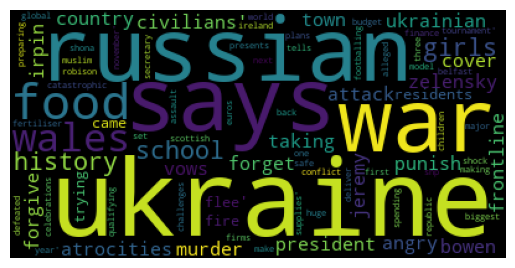

<Figure size 4000x4000 with 0 Axes>

In [19]:
# CEATE WORDCLOUD PRIOR TO PREPROCESSING STEPS

from wordcloud import WordCloud

def create_wordcloud(data, column):
    words = data[column].values 
    wordcloud = WordCloud().generate(str(words))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.figure(figsize = (40,40), facecolor = None)

create_wordcloud(data, 'combined_text')

Info. about combined_text columns is as follows: 



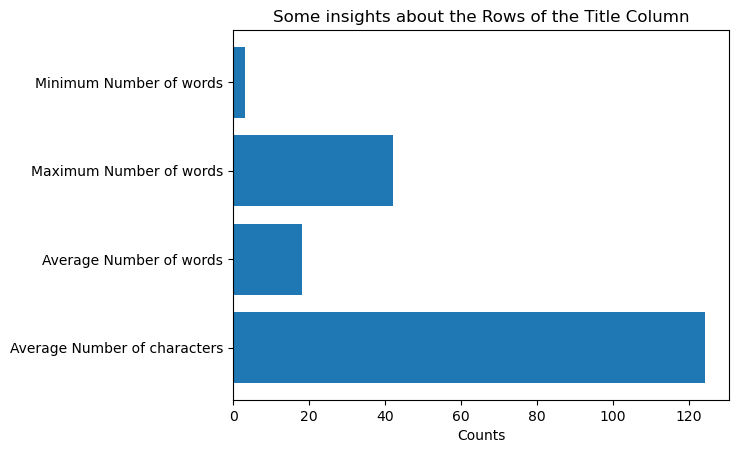

In [20]:
# VISUALIZING SOME INSIGHTS ABOUT TITLE COLUMN

def column_info(data, column):
    
    print(f"Info. about {column} columns is as follows:",'\n')
    
    data['chars'] = data[column].str.len()
    
    a = data['chars'].mean()
    
    data['words'] = data[column].str.split().str.len()
    b = data['words'].mean()
    
    c = data['words'].max()
    
    d = data['words'].min()
    
    plt.barh(width = [a,b,c,d], y = ['Average Number of characters','Average Number of words','Maximum Number of words','Minimum Number of words'])
    plt.title("Some insights about the Rows of the Title Column")
    plt.xlabel("Counts")
    
column_info(data, 'combined_text')


Text(0, 0.5, 'Counts')

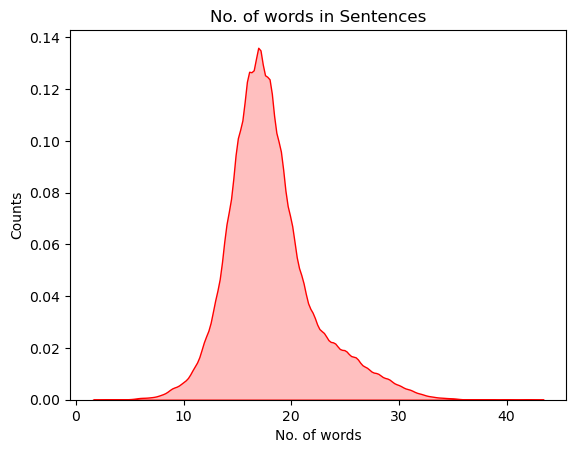

In [21]:
# PLOTTING KDE PLOT TO CHECK LENGTH OF SENTENCES

sns.kdeplot(data['words'], fill = True, color = 'red')
plt.title("No. of words in Sentences")
plt.xlabel("No. of words")
plt.ylabel("Counts")

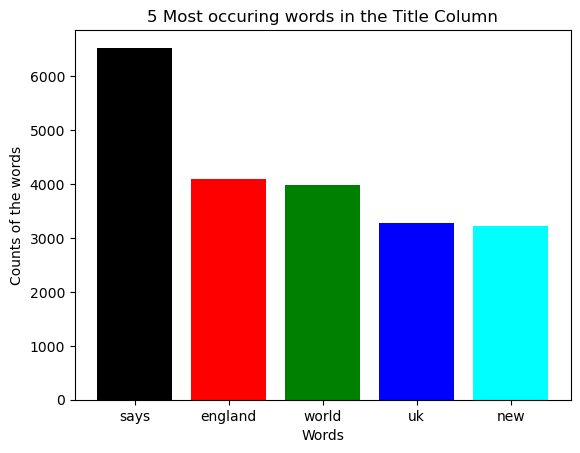

In [23]:
# PRINTING 5 MOST OCCURING WORDS IN THE TITLE COLUMN

def most_occuring_words(data, column):
    words = []
    
    word = []
    count = []
    
    for i in data[column]:
        for j in i.split():
            words.append(j)
            
    from collections import Counter
    counter = Counter(words)

    list = counter.most_common(5)
    for i,j in list:
        word.append(i)
        count.append(j)

    plt.bar(x = word, height = count,color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.title("5 Most occuring words in the Title Column")
    plt.xlabel("Words")
    plt.ylabel("Counts of the words")
    
most_occuring_words(data, 'combined_text')

In [24]:
# Step 3: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['combined_text']).toarray()

In [25]:
# Collaborative Filtering using Matrix Factorization (NMF)
nmf_model = NMF(n_components=20, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

In [26]:
# Normalize the matrices to improve cosine similarity
W_normalized = normalize(W, axis=1)
H_normalized = normalize(H, axis=1)

In [27]:
# Step 4: Hybrid Model (Content-Based + Collaborative Filtering)
def hybrid_recommendations(index, top_n=5):
    # Content-Based Similarity
    content_sim_scores = list(enumerate(cosine_similarity([X[index]], X)[0]))
    content_sim_scores = sorted(content_sim_scores, key=lambda x: x[1], reverse=True)
    content_sim_scores = content_sim_scores[1:top_n+1]

    # Collaborative Filtering Similarity
    collab_sim_scores = list(enumerate(cosine_similarity([W_normalized[index]], W_normalized)[0]))
    collab_sim_scores = sorted(collab_sim_scores, key=lambda x: x[1], reverse=True)
    collab_sim_scores = collab_sim_scores[1:top_n+1]

    # Combining both similarities by averaging their scores
    hybrid_scores = {}
    for item in content_sim_scores:
        hybrid_scores[item[0]] = item[1] * 0.5  # 50% weight for content-based
    for item in collab_sim_scores:
        if item[0] in hybrid_scores:
            hybrid_scores[item[0]] += item[1] * 0.5  # 50% weight for collaborative
        else:
            hybrid_scores[item[0]] = item[1] * 0.5

    # Sorting final hybrid scores
    hybrid_scores = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    article_indices = [i[0] for i in hybrid_scores]

    return data.iloc[article_indices][['title', 'link', 'pubDate']]

In [28]:
# Step 5: Model Evaluation (Simple Example)
def evaluate_model():
    sample_index = np.random.randint(0, len(data))
    print(f"Article: {data['title'][sample_index]}")
    print("Recommended Articles:")
    print(hybrid_recommendations(sample_index))

In [29]:
# Evaluate the model
evaluate_model()

Article: Boy admits killing schoolgirl at London bus stop
Recommended Articles:
                                                   title  \
18190  Brittany: Girl, 11, from British family shot d...   
21411  Pret a Manger fined over London worker stuck i...   
9880   Takeoff: Tributes to Migos rapper shot dead in...   
2383      Dutch boy, 4, takes mother's car for a joyride   
20224  TikTok influencer and mother guilty of murderi...   

                                                    link  \
18190  https://www.bbc.co.uk/news/world-europe-658740...   
21411  https://www.bbc.co.uk/news/uk-england-london-6...   
9880   https://www.bbc.co.uk/news/entertainment-arts-...   
2383   https://www.bbc.co.uk/news/world-europe-612945...   
20224  https://www.bbc.co.uk/news/uk-england-leiceste...   

                             pubDate  
18190  Sun, 11 Jun 2023 21:21:13 GMT  
21411  Wed, 30 Aug 2023 20:33:56 GMT  
9880   Tue, 01 Nov 2022 22:59:35 GMT  
2383   Sun, 01 May 2022 22:04:45 GMT  
202

In [30]:
# Step 6: Save the model
with open('hybrid_news_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump((vectorizer, nmf_model, W_normalized, cosine_similarity), model_file)

In [31]:
print("Hybrid model training and evaluation completed. Model saved successfully.")

Hybrid model training and evaluation completed. Model saved successfully.
